In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

## Company Data

In [2]:
company_data=pd.read_csv("Company_Data.csv")

# EDA & Data Cleaning

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Dealing with Categorical Columns for independent variables
company_data=pd.get_dummies(company_data,columns=["Urban","US"],drop_first=True)

In [6]:
# Dealing with dependent variables column
label_encoder=LabelEncoder()
company_data["ShelveLoc"]=label_encoder.fit_transform(company_data["ShelveLoc"])


In [7]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## Visualizing

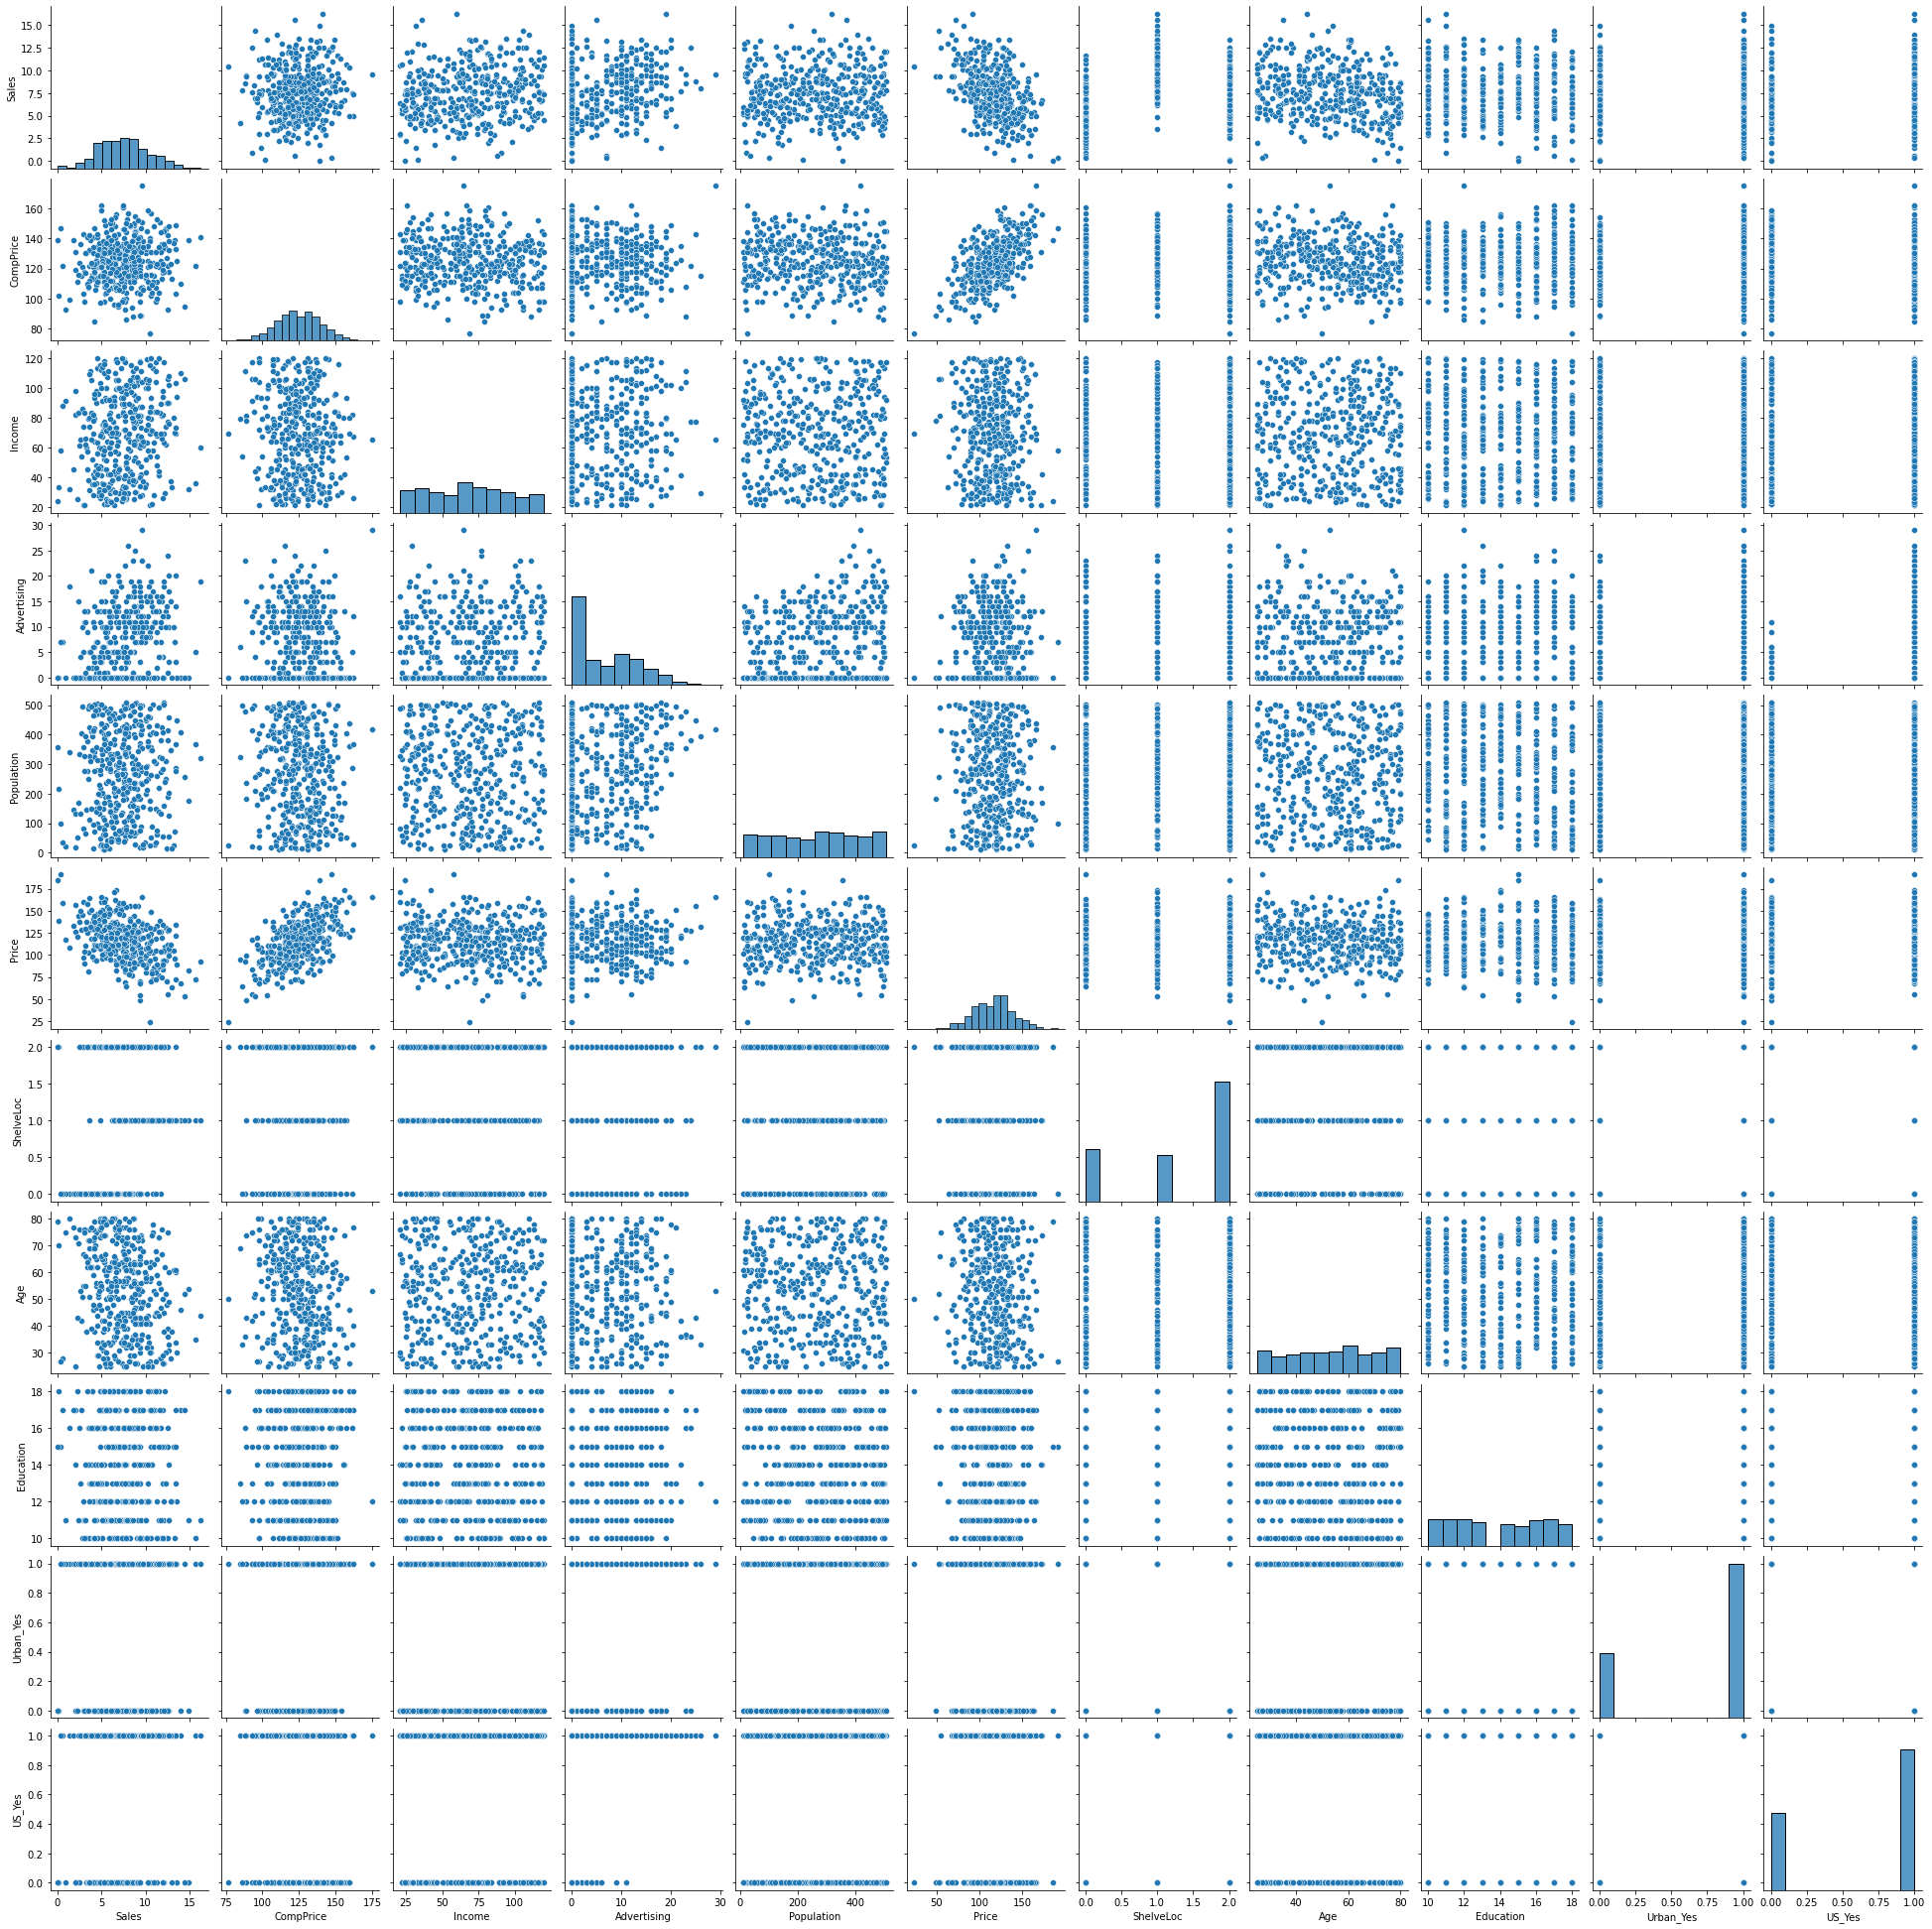

In [8]:
sns.pairplot(company_data)

### Train Test Split


In [9]:
x=company_data.drop(columns=["Sales"])
y=company_data["Sales"]

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

# Model building

In [11]:
model=DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [12]:
cv=KFold(n_splits=10)
modelll=DecisionTreeRegressor(criterion = 'squared_error', max_depth = 2)
scores=cross_val_score(model,x_train,y_train,cv=cv)


In [13]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [14]:
scores

array([ 0.34529397, -0.18434538,  0.36883087,  0.32326167,  0.28149183,
        0.31806018,  0.19416451,  0.23513572,  0.16527931,  0.24659086])

In [15]:
scores.mean()

0.2293763550601246

# Hyperparameter tuning

In [16]:
max_depth = list(range(1,10))
criterion=["squared_error", "friedman_mse", "absolute_error"]
parameters = {"criterion" : criterion, "max_depth" : max_depth}

model = DecisionTreeRegressor()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x, y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.42801966032638517
{'criterion': 'friedman_mse', 'max_depth': 6}


# Vizualizing

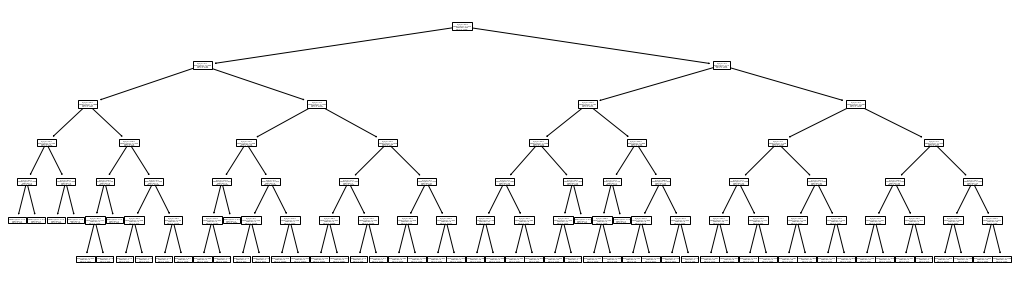

In [18]:
model=DecisionTreeRegressor(criterion = 'squared_error', max_depth = 6)
model.fit(x_train,y_train)

#PLot the decision tree
plt.figure(figsize=(18,5))
plot_tree(model)
plt.show()

In [19]:
y_pred=model.predict(x_test)
mean_squared_error(y_test,y_pred)

4.757724817295676